# TP Clustering 5SDBD

Salma ABoumzrag

Théo Fontana

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import time
import kmedoids
import scipy.cluster.hierarchy as shc

from matplotlib.patches import Polygon

from sklearn import cluster
from sklearn import metrics
from scipy.io import arff


## 1 - Jeux de données

In [37]:
path ='./artificial/'
databrut = arff.loadarff(open(path+"xclara.arff",'r'))
data = [[x[0],x[1]] for x in databrut[0]]
labels_true = [x[2] for x in databrut[0]]

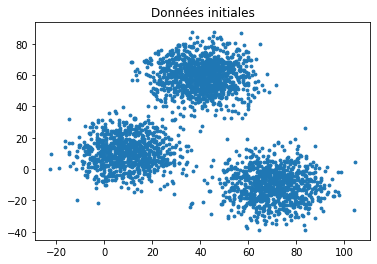

In [38]:
f0 = [f[0] for f in data]
f1 = [f[1] for f in data]

plt.scatter(f0,f1, s=8)
plt.title("Données initiales")
plt.show()

## 2 - Clustering k-Means et K-Medoids
### 2.1 - Pour démarrer

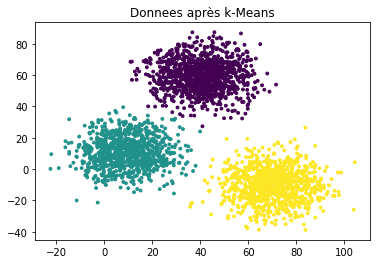

nb clusters= 3  ,nb iter= 3 runtime =  44.38  ms


In [39]:
tps1=time.time()
k=3
model=cluster.KMeans(n_clusters=k , init='k-means++')
model.fit(data)
tps2=time.time()
labels=model.labels_
iteration=model.n_iter_

plt.title('Donnees après k-Means')
plt.scatter(f0,f1, c=labels,s=8)
plt.show()

print('nb clusters=',k," ,nb iter=",iteration ,"runtime = ",round((tps2-tps1)*1000,2)," ms")

### 2.2 - Intérêt de la méthodes k-Means

In [40]:
silhouette_scores = []
davies_bouldin_scores = []
labels=[]
times = []
clusters = [k for k in range(2,11)]

for k in range(2,11):
    tps1=time.time()
    model=cluster.KMeans(n_clusters=k , init='k-means++')
    model.fit(data)
    tps2=time.time()
    times.append(round((tps2-tps1)*1000,2))
    labels.append(model.labels_)
    iteration=model.n_iter_
    silhouette_scores.append(metrics.silhouette_score(data, model.labels_))
    davies_bouldin_scores.append(metrics.davies_bouldin_score(data, model.labels_))
    
best_score_index = np.argmax(silhouette_scores)
best_score = max(silhouette_scores)
best_nb_cluster = clusters[best_score_index]  


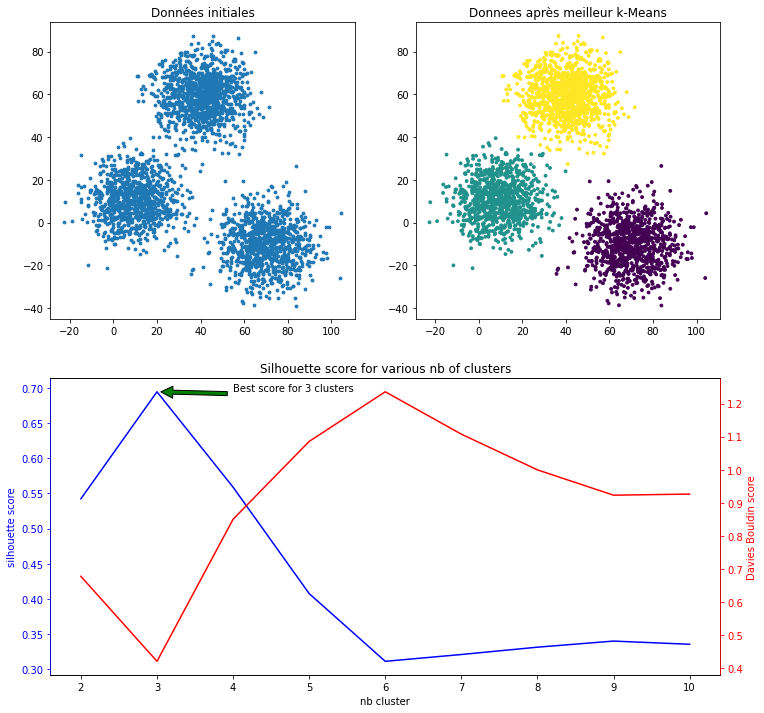

In [41]:
fig = plt.figure()
fig.set_size_inches(12,12)

ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1)
ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)

ax1.scatter(f0,f1, s=8)
ax1.set_title("Données initiales")

ax2.scatter(f0,f1, c=labels[best_score_index],s=8)
ax2.set_title("Donnees après meilleur k-Means")


ax3_bis = ax3.twinx()

ax3.set_title('Silhouette score for various nb of clusters')
ax3.set_xlabel('nb cluster')  
ax3.set_ylabel('silhouette score', color='b')  
ax3.plot(clusters,silhouette_scores,'b')
ax3.tick_params(axis='y', colors='b')


ax3_bis.spines['left'].set_color('b')        
ax3_bis.tick_params(axis='y', colors='r')
ax3_bis.spines['right'].set_color('r')
ax3_bis.set_ylabel('Davies Bouldin score', color='r')
ax3_bis.plot(clusters,davies_bouldin_scores,'r')
ax3.annotate(
                'Best score for '+ str(best_nb_cluster) + ' clusters', 
                xy =(best_nb_cluster,best_score),
                xytext =(best_nb_cluster+1,best_score), 
                arrowprops = dict(facecolor ='green',shrink = 0.05)
            )


plt.show()


### 2.3 - Limites de la méthodes k-Means

### 2.4 - Méthodes k-Medoids


 Loss with FasterPAM: 48584.764578748


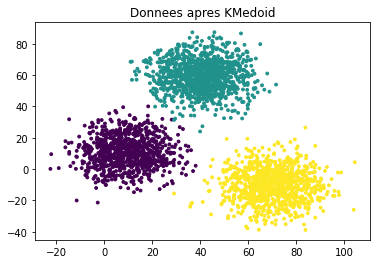

nb clusters= 3 
nb iter =  2 
runtime =  136.36 ms
rand score:  0.9973206624430365
mutual info score:  1.079414613669158


In [42]:
tps1 = time.time()
k=3
distmatrix = metrics.pairwise.manhattan_distances(data)
fp= kmedoids.fasterpam(distmatrix, k)
tps2 = time.time()
iter_kmed = fp.n_iter
labels_kmed = fp.labels

print("\n Loss with FasterPAM:",fp.loss)

plt.scatter(f0,f1, c=labels_kmed,s=8)
plt.title("Donnees apres KMedoid")
plt.show()
print('nb clusters=',k,"\nnb iter = ",iter_kmed ,"\nruntime = ",round((tps2-tps1)*1000,2),"ms")
print("rand score: ", metrics.rand_score(labels_true,labels_kmed))
print("mutual info score: ", metrics.mutual_info_score(labels_true, labels_kmed))


3


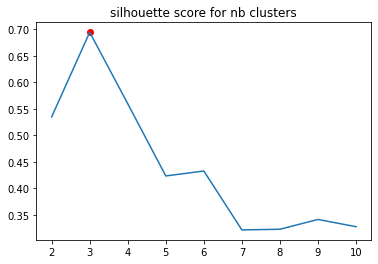

In [43]:
distmatrix = metrics.pairwise.euclidean_distances(data)
scores = []
clusters = [k for k in range(2,11)]
for k in range(2,11):
    fp= kmedoids.fasterpam(distmatrix, k)
    tps2 = time.time()
    iter_kmed = fp.n_iter
    labels_kmed = fp.labels
    scores.append(metrics.silhouette_score(data, fp.labels, metric='euclidean'))
plt.title('silhouette score for nb clusters')    
plt.plot(clusters,scores)

best_nb_cluster = clusters[np.argmax(scores)]
print(best_nb_cluster)
plt.scatter(best_nb_cluster,max(scores),c='red')
plt.show()